In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Ruchit Singh\Desktop\MLcourse.AI\Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# of Rows and Columns 
df.shape

(891, 12)

In [4]:
#List of columns
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
#info of every attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#INFO about numerical values
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#INFO on non numerical values
df.describe(include=["object","bool"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Barbara, Miss. Saiide",male,1601,G6,S
freq,1,577,7,4,644


In [10]:
#Removing the non essential attributes
df.drop(["PassengerId","Name","Ticket"],inplace=True,axis=1)

In [13]:
df.drop(["Cabin"],inplace = True,axis =1)

In [22]:
d = {"male":1,"female":0}
df["Sex"] = df["Sex"].map(d)

In [20]:
#Calculate the sum of all null values for each attribute if any
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
#Handling the missing values for Age and Embarked
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(axis=0,method="bfill")

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# EDA

## UNIVARIATE ANALYSIS

1. QUANTITATIVE VARIABLES

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BA0680B48>,
      dtype=object)

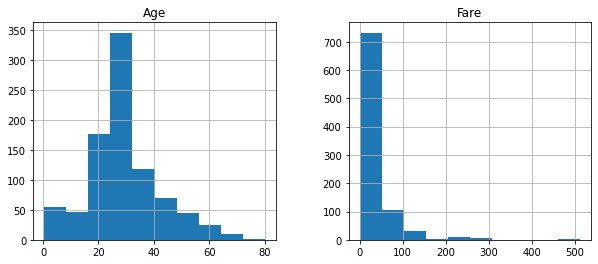

In [104]:
features = ["Fare","Age"]
df[features].hist(figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B9EEBBCC8>,
      dtype=object)

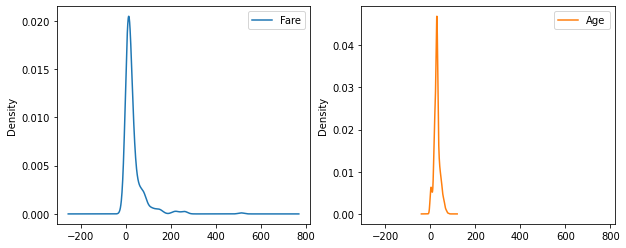

In [112]:
df[features].plot(kind="density",subplots=True,layout=(1,2),figsize=(10,4))

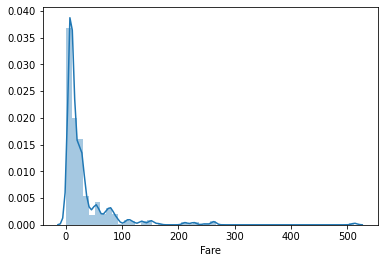

In [115]:
sns.distplot(df["Fare"])

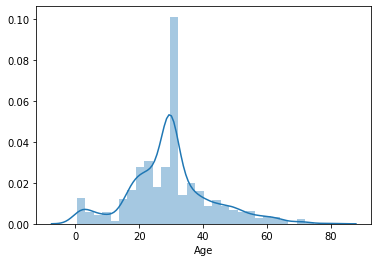

In [116]:
sns.distplot(df["Age"])

2. Categorical values

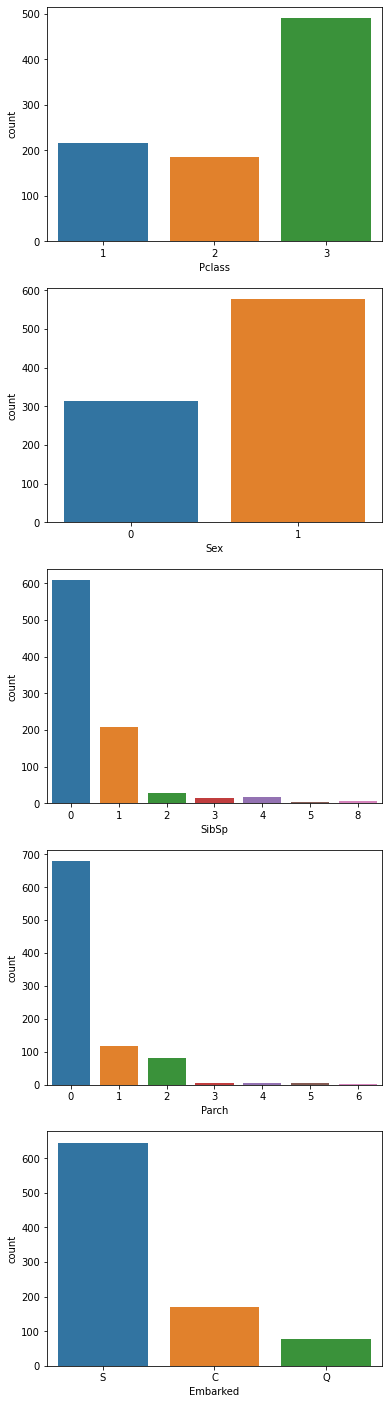

In [157]:
_,axes=plt.subplots(5,1,figsize=(6,25))


sns.countplot("Pclass",data=df,ax=axes[0])
sns.countplot("Sex",data=df,ax=axes[1])
sns.countplot("SibSp",data=df,ax=axes[2])
sns.countplot("Parch",data=df,ax=axes[3])
sns.countplot("Embarked",data=df,ax=axes[4])

 ## MULTIVARIATE ANALYSIS

 ### SURVIVAL STATS

In [61]:
df["Survived"] = df["Survived"].map({0:"No",1:"Yes"})

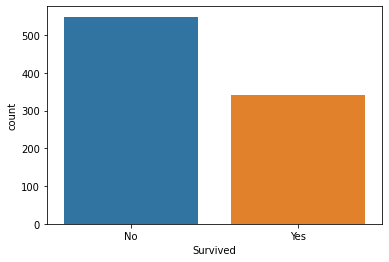

In [62]:
sns.countplot("Survived",data=df)

In [40]:
print("The percentage of the people who survived =",df["Survived"].mean()*100,"%")

The percentage of the people who survived = 38.38383838383838 %


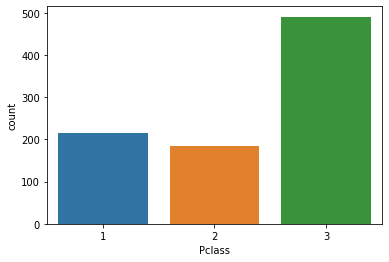

In [44]:
'''
1st = Upper
2nd = Middle
3rd = Lower

'''

sns.countplot("Pclass", data = df)

1. SURVIVAL VS PCLASS

In [63]:
#Did the pclass influence the survival rate of the person
pd.crosstab(df["Survived"],df["Pclass"],margins=True).T

Survived,No,Yes,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


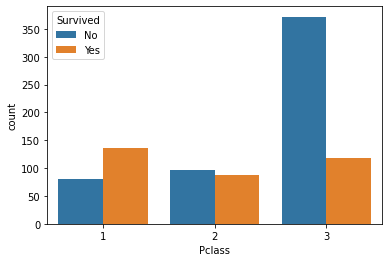

In [64]:
sns.countplot("Pclass",hue="Survived",data=df)

2. SURVIVAL VS SEX

In [65]:
#Relationship b/w the sex and the survival rate
pd.crosstab(df["Sex"],df["Survived"],margins=True)

Survived,No,Yes,All
Sex,,,
0,81,233,314
1,468,109,577
All,549,342,891


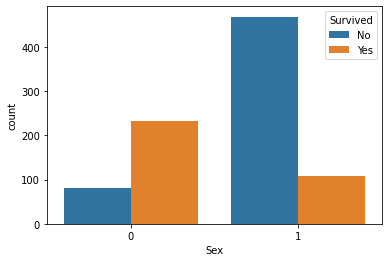

In [66]:
sns.countplot("Sex",hue="Survived",data = df)

3. SURVIVAL VS AGE/FARE

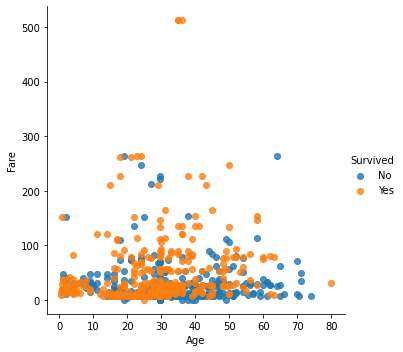

In [79]:
sns.lmplot("Age","Fare",hue="Survived",data = df,fit_reg=False)

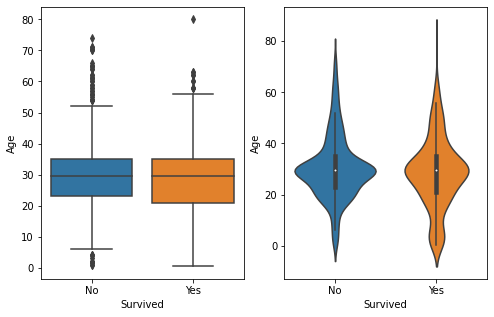

In [83]:
_,axes = plt.subplots(1,2,figsize=(8,5))

sns.boxplot(y="Age",x="Survived",data = df,ax = axes[0])
sns.violinplot(y="Age",x="Survived",data = df,ax=axes[1])

4. SURVIVAL RATE VS SibSp/Parch

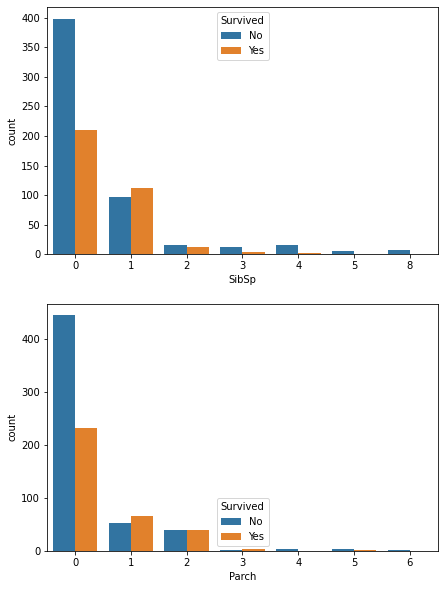

In [98]:
_,axes = plt.subplots(2,1,figsize=(7,10))

sns.countplot("SibSp",hue="Survived",data=df,ax=axes[0])
sns.countplot("Parch",hue="Survived",data=df,ax=axes[1])

5. SURVIVAL VS EMBARKED

In [ ]:
'''
C = Cherbourg, Q = Queenstown, S = Southampton
'''

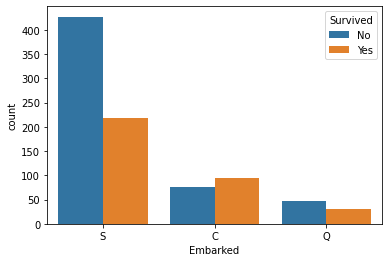

In [100]:
sns.countplot("Embarked",hue="Survived",data =df)

In [165]:
# Mean of the fare men paid
df[df["Sex"]==1]["Fare"].mean()

25.523893414211418

In [164]:
# Mean of fare women paid
df[df["Sex"]==0]["Fare"].mean()

44.47981783439487

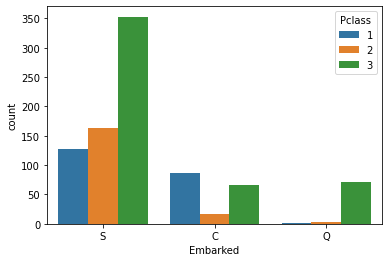

In [166]:
# Count of people in different passenger class at different ports
sns.countplot("Embarked",hue="Pclass",data=df)

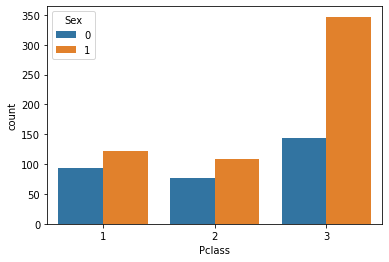

In [159]:
# How many males/females were there in different Pclass
sns.countplot("Pclass",hue="Sex",data =df)

In [175]:
#Cost for each passenger class
for i in range(1,4):
    print("Average Fare for entering Passenger Class {}".format(i),"is {:.2f}".format(df[df["Pclass"]==i]["Fare"].mean()))

Average Fare for entering Passenger Class 1 is 84.15
Average Fare for entering Passenger Class 2 is 20.66
Average Fare for entering Passenger Class 3 is 13.68


In [177]:
#Average age and max age of people in each passenger Class
for i in range(1,4):
    print("Average age in Passenger Class {}".format(i),"is {:.2f}".format(df[df["Pclass"]==i]["Age"].mean()))
print("------------------------------------------------------")
for i in range(1,4):
    print("Maximum age in Passenger Class {}".format(i),"is {:.2f}".format(df[df["Pclass"]==i]["Age"].max()))

Average age in Passenger Class 1 is 37.05
Average age in Passenger Class 2 is 29.87
Average age in Passenger Class 3 is 26.40
------------------------------------------------------
Maximum age in Passenger Class 1 is 80.00
Maximum age in Passenger Class 2 is 70.00
Maximum age in Passenger Class 3 is 74.00


In [179]:
df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


In [180]:
df.cov()

,Pclass,Sex,Age,SibSp,Parch,Fare
Pclass,0.699015,0.052712,-3.601855,0.076599,0.012429,-22.830196
Sex,0.052712,0.228475,0.523000,-0.060422,-0.094584,-4.330946
Age,-3.601855,0.523000,169.052400,-3.335345,-1.877987,59.162200
SibSp,0.076599,-0.060422,-3.335345,1.216043,0.368739,8.748734
Parch,0.012429,-0.094584,-1.877987,0.368739,0.649728,8.661052
Fare,-22.830196,-4.330946,59.162200,8.748734,8.661052,2469.436846


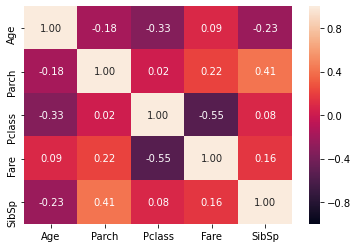

In [194]:
numerical = list(set(df.columns)
                 -{"Sex",
                   "Embarked",
                   "Survival"})
sns.heatmap(data=df[numerical].corr(),annot=True,fmt=".2f",vmin=-1,vmax=1)

None of the features are highly correlated, so safe to say, we can continue ahead

In [195]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [198]:
df_tsne = df.drop(["Survived","Embarked"], axis=1)

In [202]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df_tsne_scaled = scaler.fit_transform(df_tsne)

In [204]:
tsne = TSNE(random_state=17)
tsne_rep = tsne.fit_transform(df_tsne_scaled)

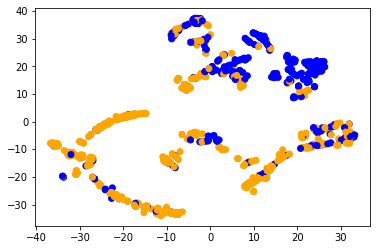

In [208]:
plt.scatter(tsne_rep[:,0],tsne_rep[:,1],c=df["Survived"].map({"Yes":"blue","No":"orange"}))